# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faanui,-16.4833,-151.7500,27.98,76,21,4.57,PF,1682461583
1,viedma,-40.8135,-62.9967,20.68,48,100,0.97,AR,1682461316
2,bluff,-46.6000,168.3333,11.56,64,99,9.16,NZ,1682461584
3,klaksvik,62.2266,-6.5890,0.51,60,100,9.22,FO,1682461585
4,hobart,-42.8794,147.3294,12.92,77,0,4.63,AU,1682461457


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faanui,-16.4833,-151.7500,27.98,76,21,4.57,PF,1682461583
1,viedma,-40.8135,-62.9967,20.68,48,100,0.97,AR,1682461316
2,bluff,-46.6000,168.3333,11.56,64,99,9.16,NZ,1682461584
3,klaksvik,62.2266,-6.5890,0.51,60,100,9.22,FO,1682461585
4,hobart,-42.8794,147.3294,12.92,77,0,4.63,AU,1682461457


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

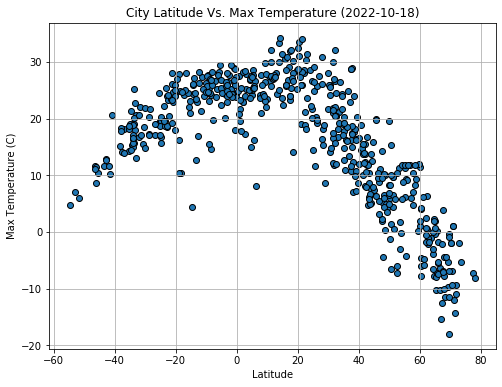

In [114]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

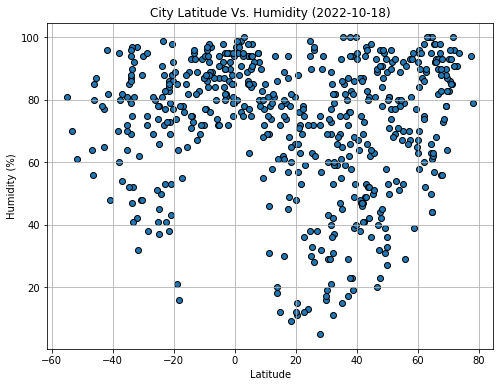

In [115]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

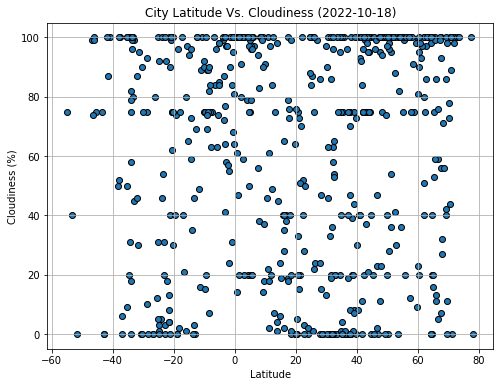

In [116]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

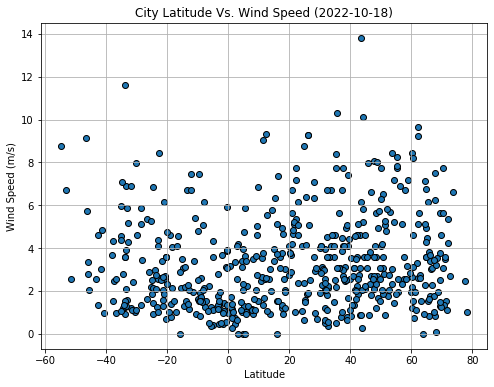

In [117]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [118]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# linePlot = (slope*x + intercept)

In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,klaksvik,62.2266,-6.5890,0.51,60,100,9.22,FO,1682461585
5,hargeysa,9.5600,44.0650,22.05,72,18,6.87,SO,1682461586
6,puerto escondido,15.8500,-97.0667,30.46,62,40,5.14,MX,1682461554
9,severo-kurilsk,50.6789,156.1250,1.33,81,28,6.51,RU,1682461438
10,pathein,16.7833,94.7333,26.80,79,38,3.58,MM,1682461588


In [120]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faanui,-16.4833,-151.7500,27.98,76,21,4.57,PF,1682461583
1,viedma,-40.8135,-62.9967,20.68,48,100,0.97,AR,1682461316
2,bluff,-46.6000,168.3333,11.56,64,99,9.16,NZ,1682461584
4,hobart,-42.8794,147.3294,12.92,77,0,4.63,AU,1682461457
7,mataura,-46.1927,168.8643,11.38,85,100,2.77,NZ,1682461458


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.8702533994795458


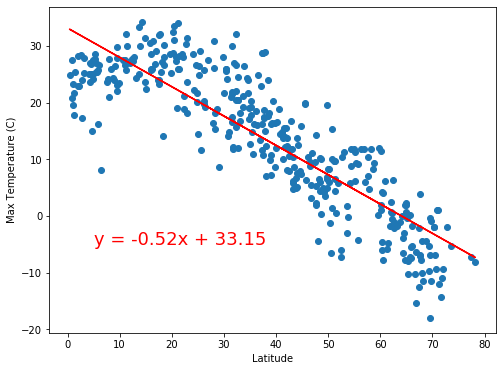

In [121]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
northern_temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
northern_temp_regression_values = slope*northern_hemi_df['Lat']+intercept
plt.plot(northern_hemi_df['Lat'],northern_temp_regression_values,"r-")
plt.annotate(northern_temp_line_eq,(5,-5),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig5.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: 0.7354772590277944


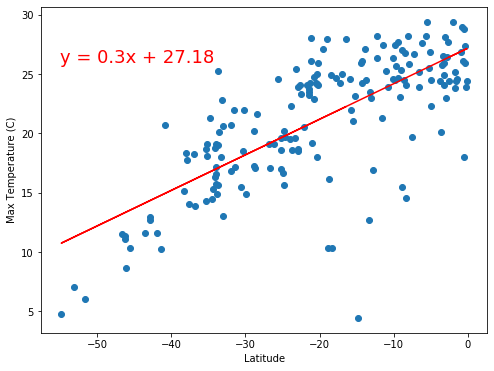

In [122]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
southern_temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
southern_temp_regression_values = slope*southern_hemi_df['Lat']+intercept
plt.plot(southern_hemi_df['Lat'],southern_temp_regression_values,"r-")
plt.annotate(southern_temp_line_eq,(-55,26),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig6.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a clear correlation between the Max Temperature and the Latitude. From the graphs above, we can see that in the Northern Hemisphere, as Latitude increases, Max Temperature decreases, and with an r-value of -0.87 we can conclude that there is a highly negatively correlated relationship between Max Temperature and Latitude in the Northern Hemisphere. Converseley, the r-value of the Southern Hemisphere is 0.74, which represents a positively correlated relationship and is supported by our linear regression in the graph. 

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.07099800503331333


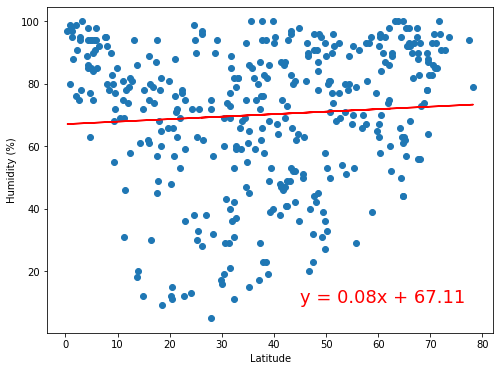

In [123]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
northern_hum_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
northern_hum_regression_values = slope*northern_hemi_df['Lat']+intercept
plt.plot(northern_hemi_df['Lat'],northern_hum_regression_values,"r-")
plt.annotate(northern_hum_line_eq,(45,10),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig7.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: 0.312069901530453


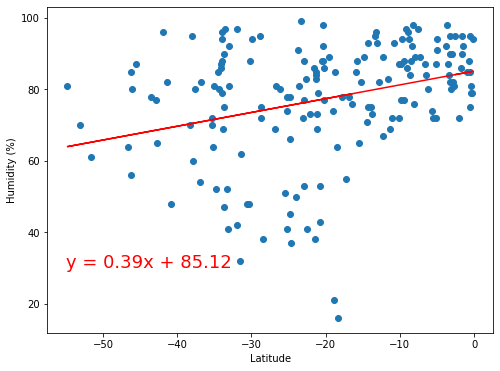

In [124]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
southern_hum_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
southern_hum_regression_values = slope*southern_hemi_df['Lat']+intercept
plt.plot(southern_hemi_df['Lat'],southern_hum_regression_values,"r-")
plt.annotate(southern_hum_line_eq,(-55,30),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig8.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, we did not see a significant linear correlation between Latitude and Humidity and overall saw a larger variance in values. It can be noted that the Northern Hemisphere saw nearly no linear correlation, with an r-value of close to 0, compared to the Southern Hemisphere at 0.31.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.10035524905074206


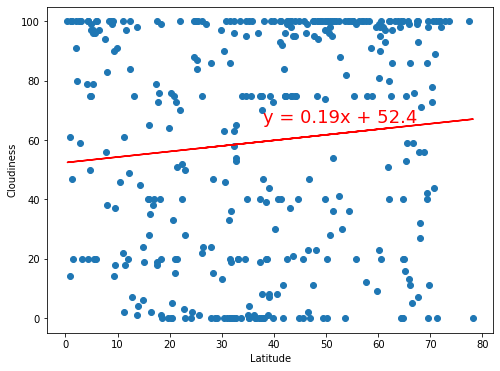

In [125]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
northern_cld_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
northern_cld_regression_values = slope*northern_hemi_df['Lat']+intercept
plt.plot(northern_hemi_df['Lat'],northern_cld_regression_values,"r-")
plt.annotate(northern_cld_line_eq,(38,66),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig9.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: 0.16290867970948178


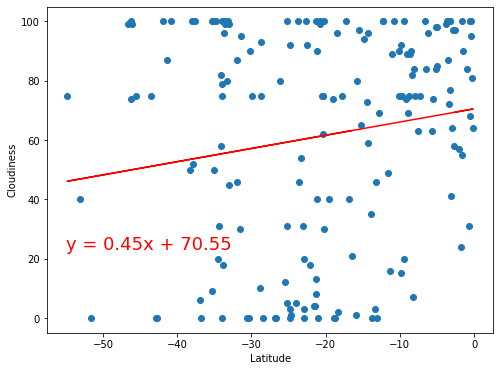

In [126]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
southern_cld_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
southern_cld_regression_values = slope*southern_hemi_df['Lat']+intercept
plt.plot(southern_hemi_df['Lat'],southern_cld_regression_values,"r-")
plt.annotate(southern_cld_line_eq,(-55,23),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig10.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Both Nothern and Southern Hemispheres saw similarly no correlation between Latitude and Cloudiness. With r-values close to 0, both showed no significant linear correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.13541376194393062


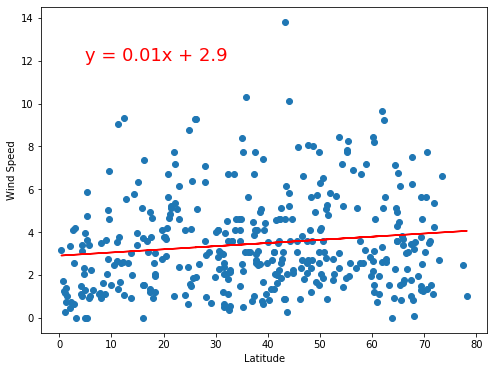

In [127]:
# Northern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
northern_wnd_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
northern_wnd_regression_values = slope*northern_hemi_df['Lat']+intercept
plt.plot(northern_hemi_df['Lat'],northern_wnd_regression_values,"r-")
plt.annotate(northern_wnd_line_eq,(5,12),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig11.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: -0.32039670451848407


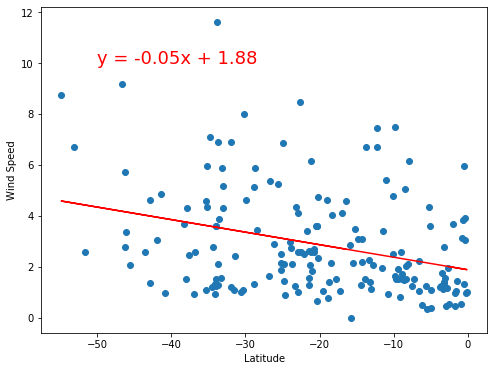

In [128]:
# Southern Hemisphere
plt.figure(figsize=(8,6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
southern_wnd_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
southern_wnd_regression_values = slope*southern_hemi_df['Lat']+intercept
plt.plot(southern_hemi_df['Lat'],southern_wnd_regression_values,"r-")
plt.annotate(southern_wnd_line_eq,(-50,10),fontsize=18,color="red")

# Save the figure
plt.savefig("../output_data/Fig12.png")

# Show figure
print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value for the Nothern Hemisphere is close to 0 at 0.14, which represents low to no linear correlation between Latitude and Wind Speed. Similarly, we saw a low value of linear correlation for the Southern Hemisphere at -0.32, however, it is distinctly negatively correlated compared to the Northern Hemisphere being slightly positively correlated. 